In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
con= sqlite3.connect("zomato_rawdata.sqlite")

In [3]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [4]:
df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,None,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,None,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [5]:
df.shape

(51717, 18)

In [6]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df["rate"].replace(("NEW" ,"-"), np.nan, inplace=True)

In [12]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
"4.1/5".split("/")[0]

'4.1'

In [14]:
type("4.1/5".split("/")[0])

str

In [15]:
float("4.1/5".split("/")[0])

4.1

In [16]:
df['rate']=df['rate'].apply(lambda x: float(x.split("/")[0])if type(x)==str else x)

In [17]:
x = pd.crosstab(df['rate'],df['online_order'])

In [18]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

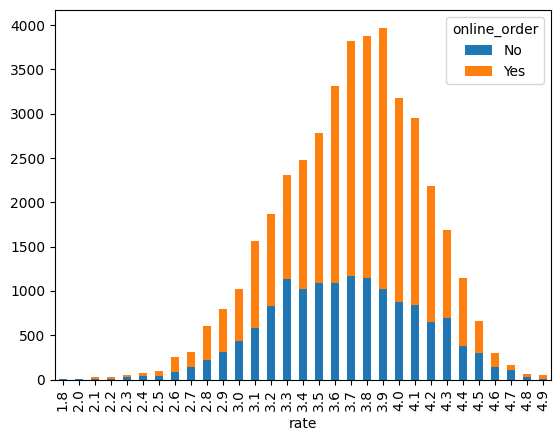

In [19]:
x.plot(kind='bar',stacked=True)

In [20]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [21]:
normalize_df = x.div(x.sum(axis=1).astype(float), axis=0)

In [22]:
normalize_df*100

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

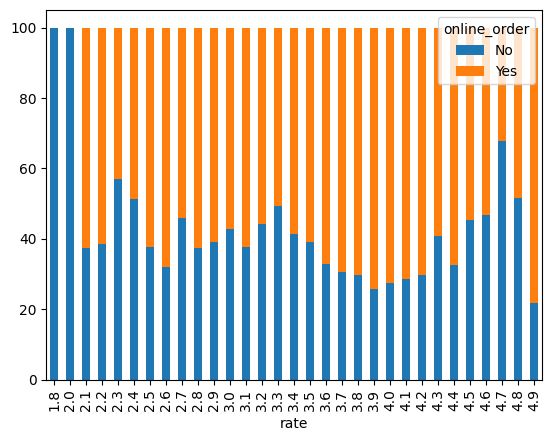

In [23]:
(normalize_df*100).plot(kind='bar',stacked=True)

In [24]:
df['rest_type'].isnull().sum()

227

In [25]:
data=df.dropna(subset=['rest_type'])

In [26]:
data['rest_type'].isnull().sum()

0

In [27]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [28]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [29]:
quick_bites_df.shape

(20639, 18)

In [30]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [31]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x .lower())

In [32]:
from nltk.corpus import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z]+")
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [33]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [34]:
sample=data[0:1000]

In [35]:
review_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [36]:
review_tokens

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

In [37]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
stop.extend(['rated','n','x','RATED','Rated'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
rev3 = review_tokens[3]
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [40]:
review_tokens_clean = review_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])
review_tokens_clean

0       [A, beautiful, place, dine, The, interiors, ta...
1       [Had, dinner, family, Turned, good, choose, su...
2       [Ambience, good, enough, pocket, friendly, caf...
3       [Great, food, proper, Karnataka, style, full, ...
4       [Very, good, restaurant, neighbourhood, Buffet...
                              ...                        
995     [Ideal, quick, neighborhood, bite, Has, good, ...
996     [We, ordered, Alankrutha, Special, Biryani, Mu...
997     [This, review, posted, year, ago, better, late...
998     [We, tried, Chicken, Shawarma, Some, Panner, G...
1000    [An, authentic, Andhra, cuisine, restaurant, s...
Name: reviews_list, Length: 1000, dtype: object

In [41]:
type(review_tokens_clean)

pandas.core.series.Series

In [42]:
total_review_2d = list(review_tokens_clean)

total_review_1d = []
for review in total_review_2d:
    for word in review:
        total_review_1d.append(word)

In [43]:
total_review_1d

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [44]:
from nltk import FreqDist
fd = FreqDist()
for word in total_review_1d:
    fd[word] = fd[word] +1

In [45]:
fd.most_common(20)

[('good', 10260),
 ('I', 9887),
 ('food', 9105),
 ('place', 8470),
 ('The', 5433),
 ('taste', 3692),
 ('chicken', 3044),
 ('service', 2756),
 ('ordered', 2530),
 ('try', 2514),
 ('like', 2375),
 ('time', 2337),
 ('also', 2236),
 ('one', 2227),
 ('really', 2184),
 ('restaurant', 2120),
 ('It', 1991),
 ('order', 1839),
 ('nice', 1833),
 ('best', 1766)]

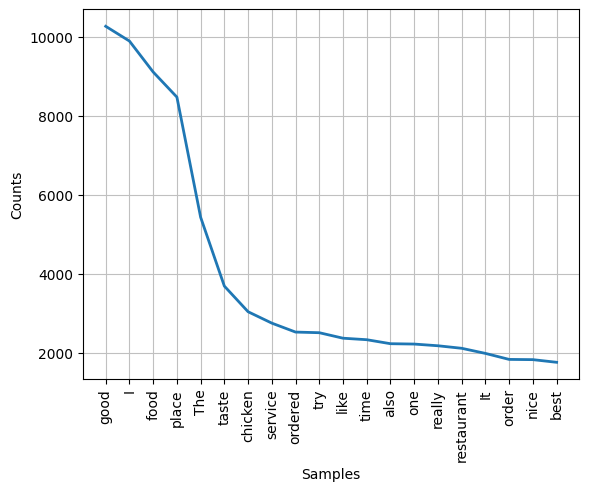

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
fd.plot(20)

In [47]:
from nltk import FreqDist, bigrams, trigrams

In [48]:
bi_grams = bigrams(total_review_1d)
bi_grams

<generator object bigrams at 0x0000029CF6968CF0>

In [49]:
fd_bigram = FreqDist()
for bigram in bi_grams:
    fd_bigram[bigram] = fd_bigram[bigram] +1

In [50]:
fd_bigram.most_common(100)

[(('I', 'ordered'), 898),
 (('really', 'good'), 713),
 (('must', 'try'), 605),
 (('This', 'place'), 532),
 (('The', 'food'), 506),
 (('food', 'good'), 445),
 (('I', 'would'), 418),
 (('visit', 'place'), 408),
 (('fried', 'rice'), 403),
 (('good', 'food'), 403),
 (('ice', 'cream'), 395),
 (('good', 'place'), 390),
 (('taste', 'good'), 379),
 (('non', 'veg'), 374),
 (('also', 'good'), 366),
 (('I', 'tried'), 355),
 (('place', 'I'), 336),
 (('food', 'I'), 329),
 (('main', 'course'), 318),
 (('good', 'taste'), 306),
 (('good', 'I'), 304),
 (('We', 'ordered'), 291),
 (('quality', 'food'), 283),
 (('The', 'place'), 277),
 (('I', 'love'), 275),
 (('good', 'The'), 262),
 (('I', 'got'), 254),
 (('pretty', 'good'), 250),
 (('good', 'service'), 249),
 (('time', 'I'), 243),
 (('one', 'best'), 233),
 (('The', 'ambience'), 230),
 (('pocket', 'friendly'), 230),
 (('value', 'money'), 230),
 (('nice', 'place'), 223),
 (('chicken', 'biryani'), 216),
 (('I', 'like'), 211),
 (('place', 'good'), 210),
 (('

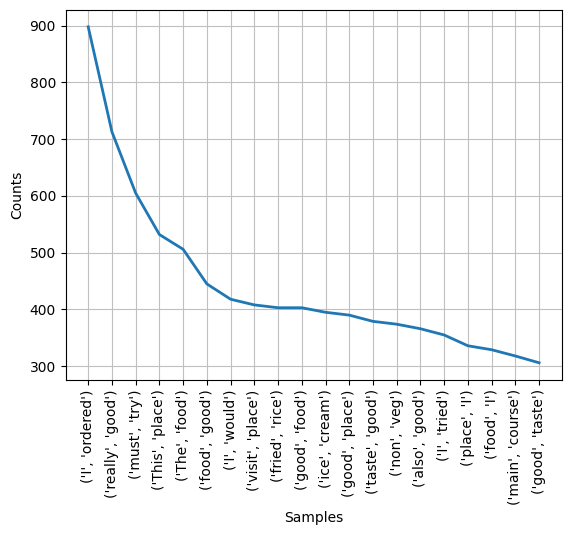

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
fd_bigram.plot(20)

In [52]:
tri_grams = trigrams(total_review_1d)
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram]+1

fd_trigrams.most_common(50)    

[(('paneer', 'tikka', 'biriyani'), 88),
 (('veg', 'non', 'veg'), 80),
 (('I', 'ordered', 'food'), 75),
 (('south', 'Indian', 'food'), 74),
 (('must', 'visit', 'place'), 72),
 (('I', 'would', 'recommend'), 63),
 (('The', 'food', 'good'), 63),
 (('paneer', 'butter', 'masala'), 62),
 (('Good', 'food', 'Good'), 60),
 (('I', 'ordered', 'chicken'), 60),
 (('delious', 'good', 'need'), 58),
 (('good', 'need', 'sum'), 58),
 (('need', 'sum', 'spacy'), 58),
 (('sum', 'spacy', 'food'), 58),
 (('spacy', 'food', 'bangnda'), 58),
 (('food', 'bangnda', 'fry'), 58),
 (('bangnda', 'fry', 'received'), 58),
 (('fry', 'received', 'Nice'), 58),
 (('I', 'visited', 'place'), 57),
 (('The', 'ambience', 'good'), 56),
 (('A', 'good', 'place'), 56),
 (('Taiwanese', 'baby', 'corn'), 56),
 (('main', 'course', 'ordered'), 56),
 (('received', 'Nice', 'delious'), 55),
 (('Nice', 'delious', 'good'), 55),
 (('nService', 'nValue', 'money'), 54),
 (('The', 'staff', 'friendly'), 53),
 (('I', 'must', 'say'), 52),
 (('The', 

In [53]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [54]:
len(df['location'].unique())

94

In [55]:
df['location'] = df['location'] + ', Bangalore, Karnataka, India'
df['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [56]:
df_copy=df.copy()
df_copy['location'].isnull().sum()

21

In [57]:
df_copy = df_copy.dropna(subset=['location'])

In [58]:
df_copy['location'].isnull().sum()

0

In [59]:
locations = pd.DataFrame(df_copy['location'].unique())

In [60]:
locations.columns =['name']
locations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [61]:
from geopy.geocoders import Nominatim

In [62]:
geolocator = Nominatim(user_agent='app',timeout=None)

lat=[]
lon=[]
for location in locations['name']:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [63]:
locations['latitude']=lat
locations['longitude']=lon
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915219,77.573621
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [64]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [65]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [66]:
locations['latitude'][79]=13.0120218
locations['longitude'][79]=77.6777817

In [67]:
locations['latitude'][85]=13.010316
locations['longitude'][85]=77.580569

In [68]:
locations.isnull().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [69]:
df['cuisines'].isnull().sum()

45

In [70]:
df = df.dropna(subset=['cuisines'])


In [71]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [72]:
north_india.shape

(21085, 18)

In [73]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [74]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'index':'name', "location":"count"})

In [75]:
north_india_rest_count

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [76]:
heatmap_df = north_india_rest_count.merge(locations, on='name', how='left')
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,12.973393,77.611234
88,"West Bangalore, Bangalore, Karnataka, India",1,13.022235,77.567183


In [77]:
basemap = folium.Map()
basemap

In [78]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [79]:
HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)

In [80]:
basemap

In [81]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name', "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations, on='name', how='left')
    print(heatmap_df.head(4))
    
    basemap =folium.Map()
    HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)
    return basemap

In [82]:
get_heatmap('South Indian')

                                     name  count   latitude  longitude
0        BTM, Bangalore, Karnataka, India    815  12.911276  77.604565
1   JP Nagar, Bangalore, Karnataka, India    437  12.912076  77.579393
2        HSR, Bangalore, Karnataka, India    436  12.911623  77.638862
3  Jayanagar, Bangalore, Karnataka, India    416  12.929273  77.582423


In [83]:
#df['cuisines'].unique()